In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [2]:
df=pd.read_csv("GS.csv")

df

,Date,Open,High,Low,Close,Adj Close,Volume
0,1999-05-04,76.000000,77.250000,70.000000,70.375000,53.576797,22320900
1,1999-05-05,69.875000,69.875000,66.250000,69.125000,52.625153,7565700
2,1999-05-06,68.000000,69.375000,67.062500,67.937500,51.721100,2905700
3,1999-05-07,67.937500,74.875000,66.750000,74.125000,56.431648,4862300
4,1999-05-10,73.375000,73.500000,70.250000,70.687500,53.814709,2589400
...,...,...,...,...,...,...,...
5757,2022-03-18,338.869995,346.769989,337.299988,345.380005,345.380005,5861100
5758,2022-03-21,345.260010,346.299988,337.149994,339.000000,339.000000,3401200
5759,2022-03-22,342.200012,346.239990,340.119995,343.010010,343.010010,2840200
5760,2022-03-23,340.000000,340.829987,335.130005,335.609985,335.609985,2196800


In [3]:
sns.set(rc={'figure.figsize':(15,10)})
df['Date']=pd.to_datetime(df['Date'])
df=df.set_index('Date')
df



,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1999-05-04,76.000000,77.250000,70.000000,70.375000,53.576797,22320900
1999-05-05,69.875000,69.875000,66.250000,69.125000,52.625153,7565700
1999-05-06,68.000000,69.375000,67.062500,67.937500,51.721100,2905700
1999-05-07,67.937500,74.875000,66.750000,74.125000,56.431648,4862300
1999-05-10,73.375000,73.500000,70.250000,70.687500,53.814709,2589400
...,...,...,...,...,...,...
2022-03-18,338.869995,346.769989,337.299988,345.380005,345.380005,5861100
2022-03-21,345.260010,346.299988,337.149994,339.000000,339.000000,3401200
2022-03-22,342.200012,346.239990,340.119995,343.010010,343.010010,2840200


<Axes: title={'center': 'Volume vs Time graph'}, xlabel='Date'>

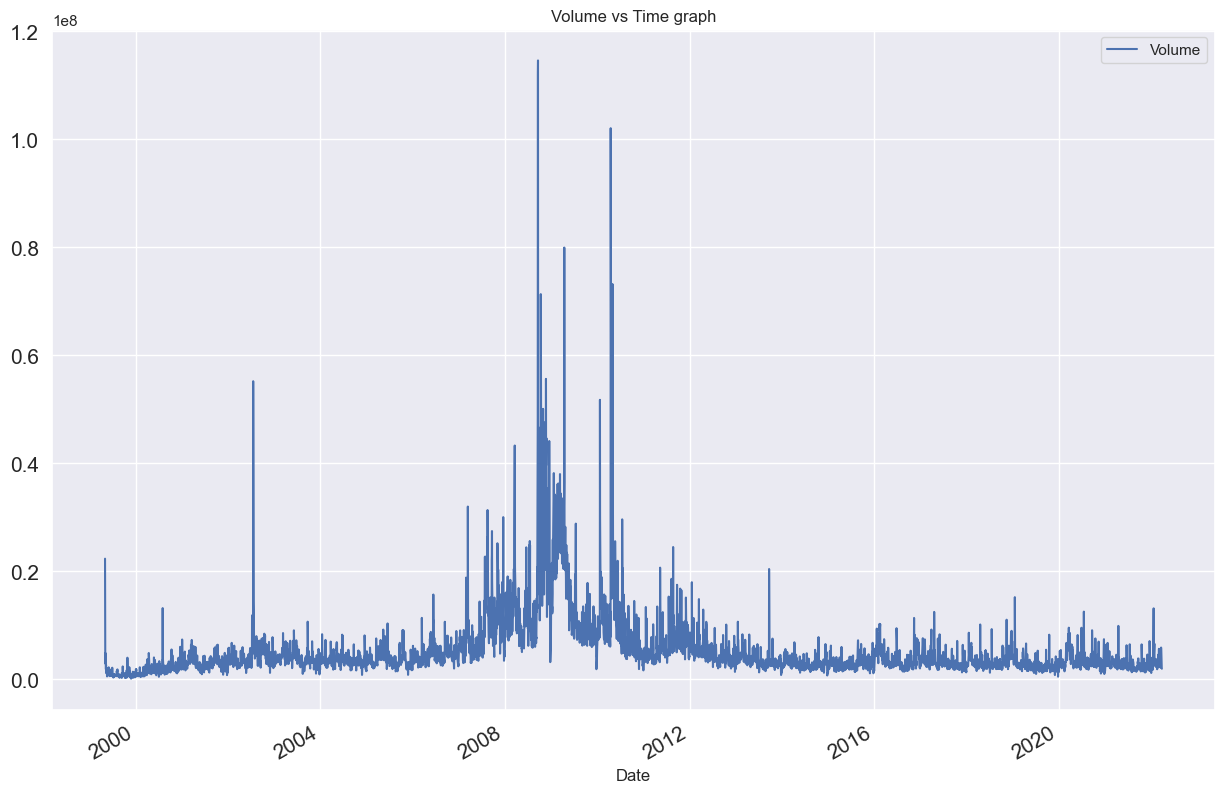

In [4]:
df.plot(y='Volume',title="Volume vs Time graph",fontsize=15)

In [5]:
ma100=df.Close.rolling(100).mean()
ma100


Date
1999-05-04           NaN
1999-05-05           NaN
1999-05-06           NaN
1999-05-07           NaN
1999-05-10           NaN
                 ...    
2022-03-18    374.656300
2022-03-21    373.870201
2022-03-22    373.190401
2022-03-23    372.398301
2022-03-24    371.627101
Name: Close, Length: 5762, dtype: float64

In [6]:
ma200=df.Close.rolling(200).mean()
ma200


Date
1999-05-04          NaN
1999-05-05          NaN
1999-05-06          NaN
1999-05-07          NaN
1999-05-10          NaN
                ...    
2022-03-18    381.27895
2022-03-21    381.01670
2022-03-22    380.79095
2022-03-23    380.54550
2022-03-24    380.31275
Name: Close, Length: 5762, dtype: float64

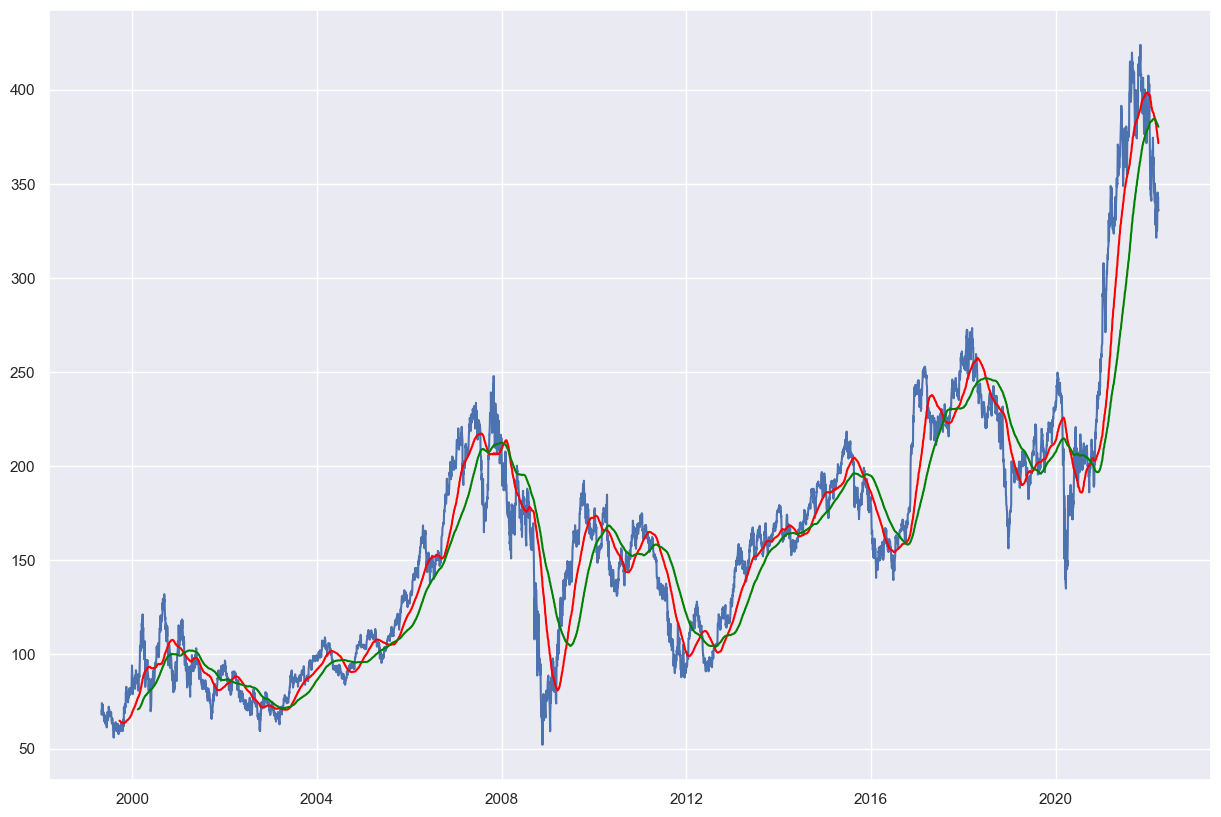

In [7]:
plt.figure(figsize=(15,10))
plt.plot(df.Close)
plt.plot(ma100,'red')
plt.plot(ma200,'green')

<Axes: title={'center': 'HIGH,LOW,CLOSE OF A DAY'}, xlabel='Date'>

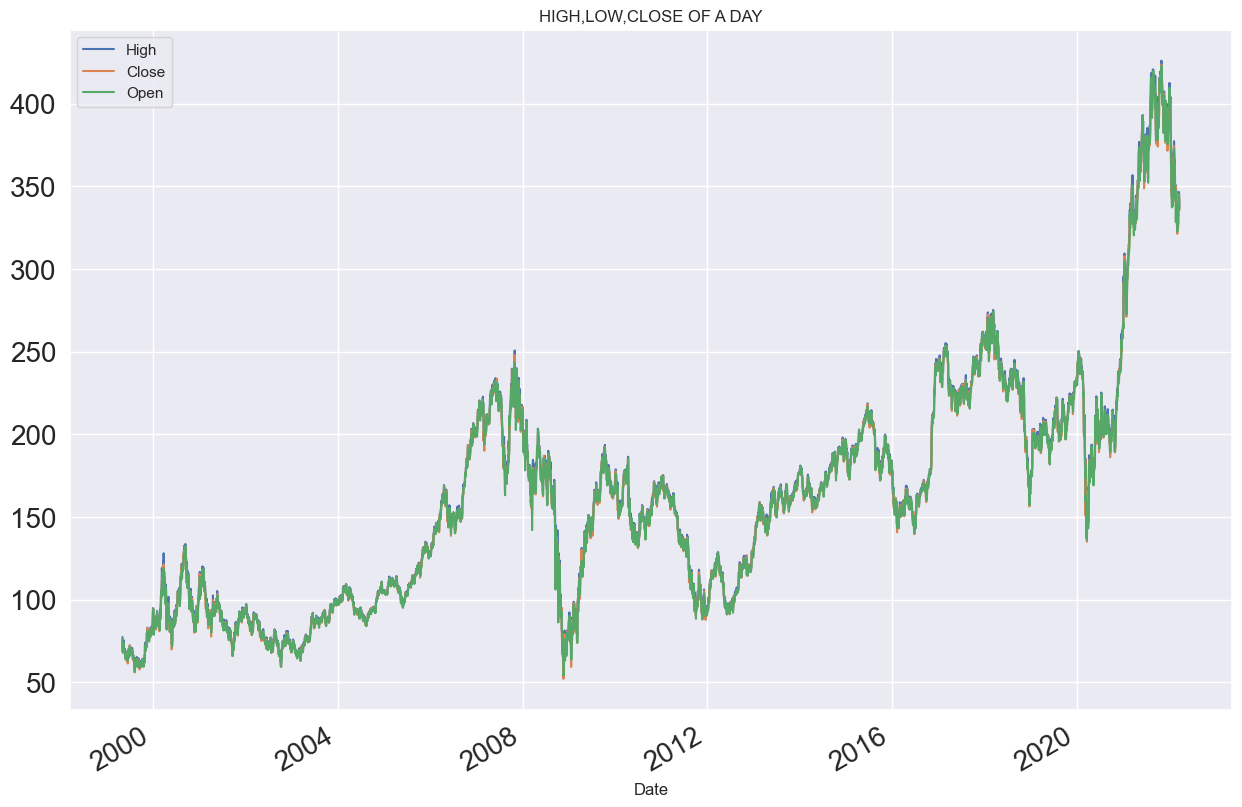

In [8]:
df.plot(y=['High','Close','Open'],title='HIGH,LOW,CLOSE OF A DAY',fontsize=20,)

In [9]:
a=df.sort_values(by='High',ascending=False).head(5)
a['High']

Date
2021-11-02    426.160004
2021-11-03    424.000000
2021-08-30    420.760010
2021-08-26    420.730011
2021-08-27    419.850006
Name: High, dtype: float64

In [10]:
b=df.sort_values(by='Low', ascending=True).head(5)
b['Low']

Date
2008-11-21    47.410000
2008-11-20    49.000000
2008-11-19    54.540001
1999-08-10    55.187500
2008-11-24    55.270000
Name: Low, dtype: float64

<Axes: xlabel='Date', ylabel='Low'>

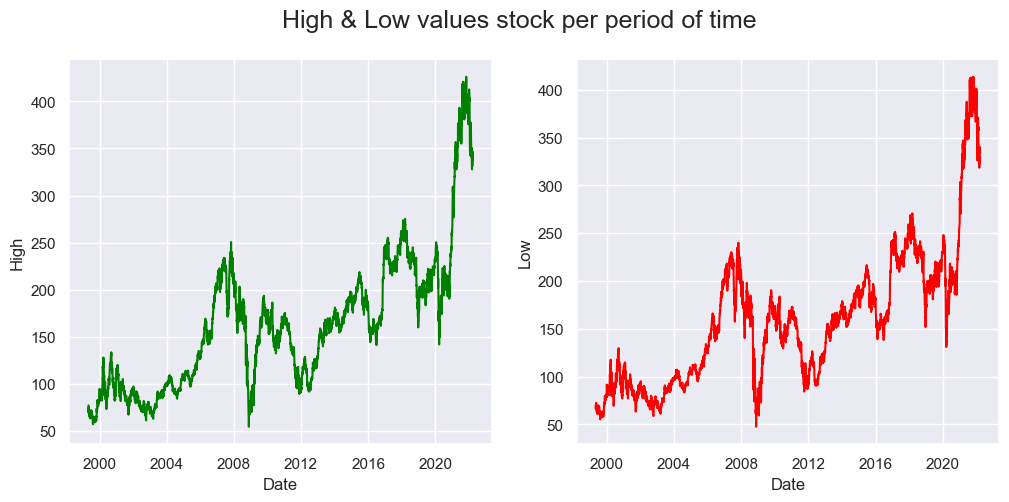

In [12]:
fig,axes = plt.subplots(nrows=1,ncols=2,sharex=True,figsize= (12,5))


fig.suptitle('High & Low values stock per period of time', fontsize=18)

sns.lineplot(ax=axes[0],y=df['High'],x=df.index, color='green')

sns.lineplot(ax=axes[1],y=df['Low'],x=df.index, color='red')

<Axes: xlabel='Year'>

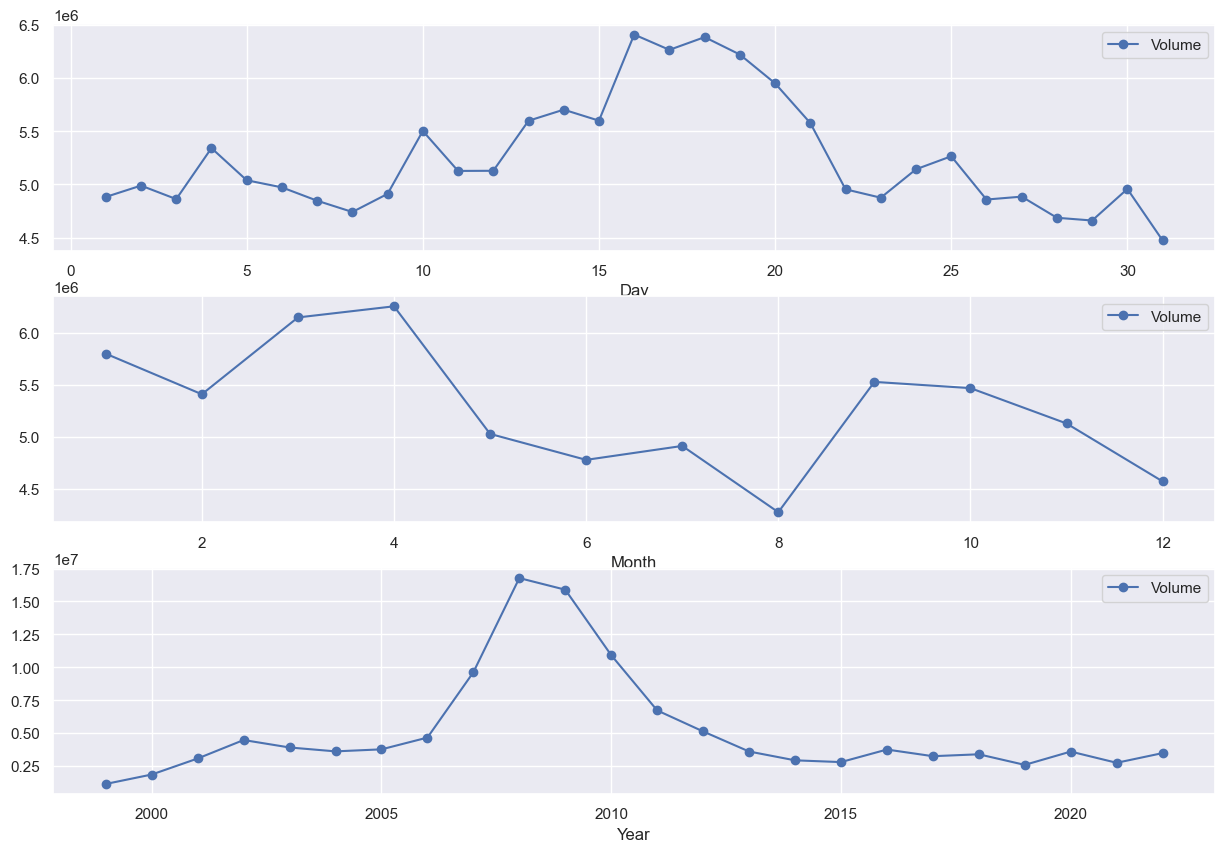

In [15]:
fig,(axis1,axis2,axis3)=plt.subplots(3,figsize=(15,10))

df.groupby(df.index.day).mean().plot(y='Volume', ax=axis1, xlabel='Day',marker='o')

df.groupby(df.index.month).mean().plot(y='Volume' ,ax=axis2, xlabel='Month',marker='o')

df.groupby(df.index.year).mean().plot(y='Volume' ,ax=axis3, xlabel='Year',marker='o')


In [20]:
df=df.tail(170)
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-07-23,374.589996,378.000000,371.380005,374.049988,368.117249,1706900
2021-07-26,373.179993,376.679993,373.109985,375.899994,369.937866,1559100
2021-07-27,372.500000,375.140015,369.220001,374.839996,368.894684,1791800
2021-07-28,375.809998,377.440002,372.339996,374.230011,368.294403,1668900
2021-07-29,377.029999,379.510010,374.809998,377.549988,371.561707,1296600
...,...,...,...,...,...,...
2022-03-18,338.869995,346.769989,337.299988,345.380005,345.380005,5861100
2022-03-21,345.260010,346.299988,337.149994,339.000000,339.000000,3401200
2022-03-22,342.200012,346.239990,340.119995,343.010010,343.010010,2840200


<Axes: title={'center': 'HIGH,LOW,CLOSE OF A DAY'}, xlabel='Date'>

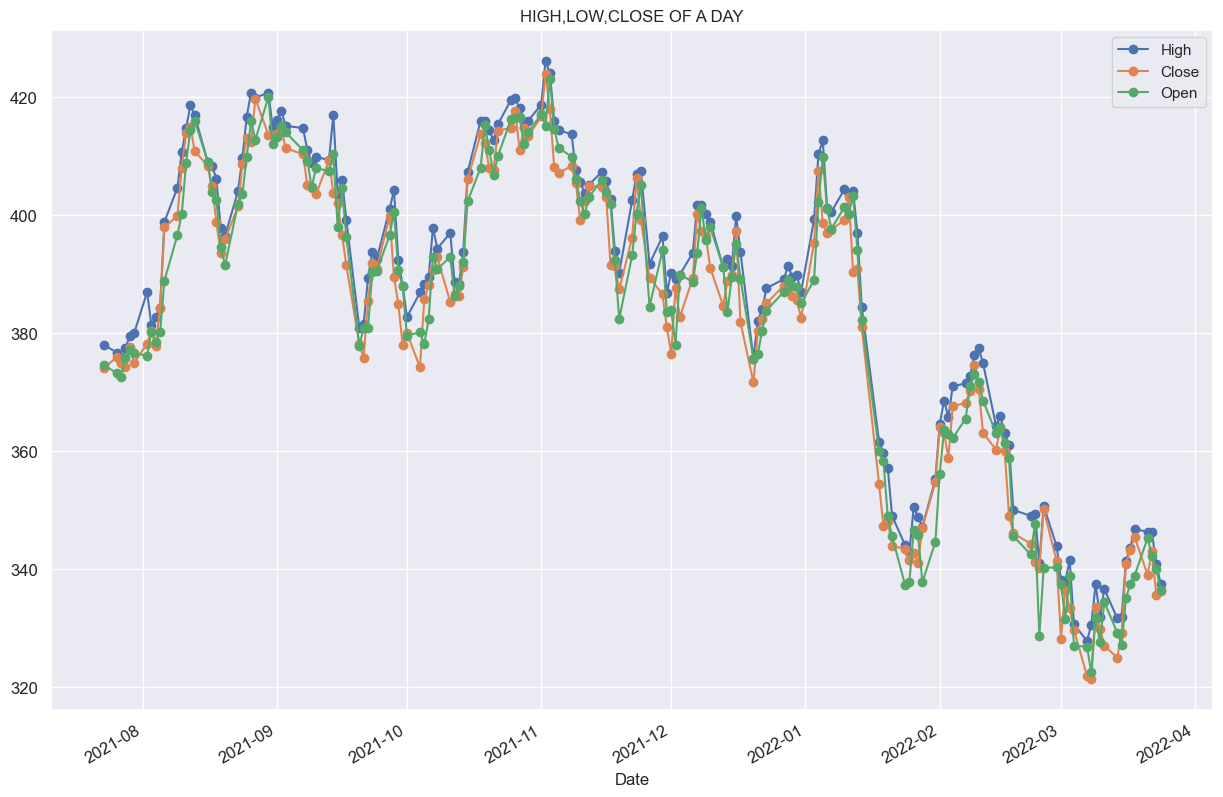

In [21]:
df.plot(y=['High','Close','Open'],title='HIGH,LOW,CLOSE OF A DAY',fontsize=12,marker='o')